## Example notebook for analytical cases with xarray

Read/plot particles positions and recompute the associated analytical velocity field

In [ ]:
import os,sys
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#######

Pyticles_folder = "/home/gula/Desktop/Work_capella/LCS/Pyticles/"

# Specific modules needed for pyticles
sys.path.append(Pyticles_folder + "Modules/") 
import pyticles_sig_sa as part

# Load particles

In [27]:
lag_file = Pyticles_folder + "out/analytical_birotexp_adv0000m_16_0000.nc"

# Open dataset
lag = xr.open_dataset(lag_file)

# check what is inside the file
lag

<xarray.Dataset>
Dimensions:     (time: 404, nq: 6561)
Coordinates:
  * time        (time) float32 0.0 1.0 2.0 3.0 4.0 ... 400.0 401.0 402.0 403.0
Dimensions without coordinates: nq
Data variables:
    ocean_time  (time) float32 ...
    px          (time, nq) float64 ...
    py          (time, nq) float64 ...
Attributes: (12/38)
    w_sed0:                0.0
    depth:                 0
    meanflow:              0
    initial_depth:         0
    dfile:                 1
    dx0:                   1
    ...                    ...
    sedimentation:         0
    ic:                    50
    jc:                    50
    lev0:                  -1
    lev1:                  -1
    depth0:                0

# Plot particles positions at the initial (time = 0) and last time (time=-1)

0 0
1 -1
CPU times: user 61.6 ms, sys: 8.38 ms, total: 70 ms
Wall time: 66.3 ms


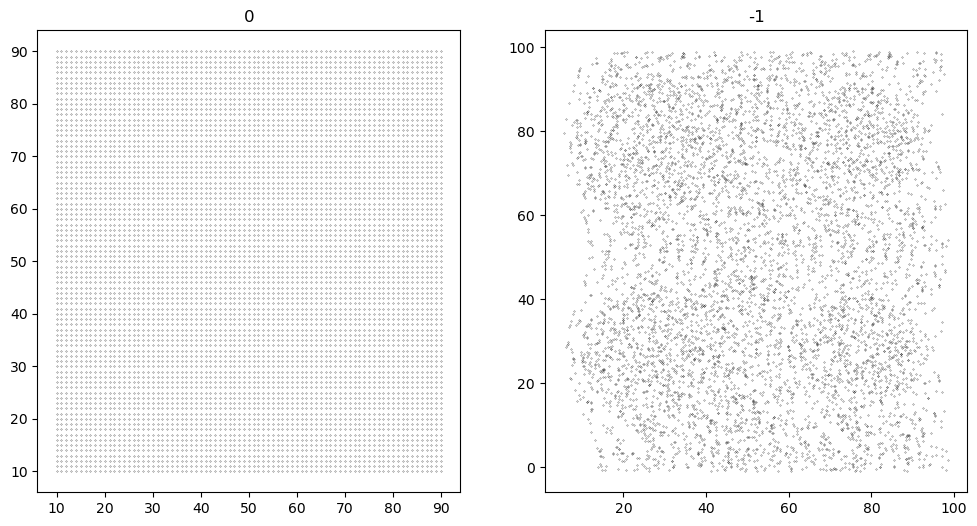

In [29]:
%%time

f, axes = plt.subplots(1, 2,figsize=(12,6))

marksize=0.2; colorpoint = 'black'; colorpointedge='black'
    
for it,time in enumerate([0,-1]):

    print(it,time)
    ax = axes[it]
    px = lag.px.isel(time=time)
    py = lag.py.isel(time=time)

    ax.set_title(time)
    # plot particles position on the domain
    ax.plot(px,py,'o',markersize=marksize,\
            markerfacecolor=colorpoint, markeredgecolor=colorpointedge)



# Load analytical velocity field

In [30]:
# read info about simulation in file:

print(lag.source)

# Load grid parameters (from particle file)
[nxi,nyi,nz,dx,dy,dz] = lag.ana_simul_parameters
simul = part.ana_load(int(nxi),int(nyi),int(nz),dx,dy,dz)

# Velocity field:
flow = lag.ana_flow



analytical


coord is  [0, 100, 0, 100]


Text(0.5, 1.0, "<xarray.DataArray 'px' ()>\narray(6561)\nCoordinates:\n    time     float32 403.0 particules ")

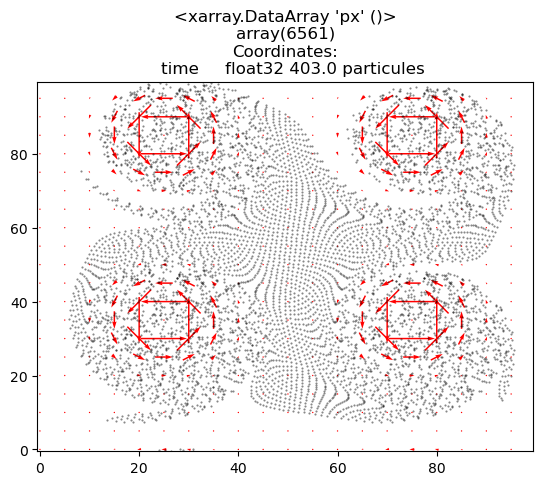

In [33]:

time = 10

# update time
simul.update(time)

# Recompute velocity field
[u,v] = part.ana_vel_surf(simul,flow=flow)


#####################
# plot with particles

fig, ax = plt.subplots()

scale=5; col = 'k'
nnu,nnv=5,5        
x,y = np.mgrid[0:nxi,0:nyi]

qv = plt.quiver(x.T[::nnv,::nnu], y.T[::nnv,::nnu],\
           part.u2rho(u).T[::nnv,::nnu],part.v2rho(v).T[::nnv,::nnu],\
             pivot='mid',color='r',scale=scale);  

#########

plt.plot(lag.px[time,:]+0.5,lag.py[time,:]+0.5,'.', markersize=1., markerfacecolor=col,markeredgecolor=col,alpha=0.5)
plt.axis([-0.5 ,nxi-0.5, -0.5, nyi-0.5])

plt.title(format(np.sum(px>-1)) + ' particules ' )      
#plt.savefig(folderout + simulname +'_' + '{0:04}'.format(time+dfile) +'.png',  dpi=250,bbox_inches='tight'); plt.clf()


